<a href="https://colab.research.google.com/github/shimanaseri/ML-coarse/blob/Mini-Project-1/ML_HW1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1lnZS1Ddct-yF4P0VotqnPM-51yyHDyAE

Downloading...
From: https://drive.google.com/uc?id=1lnZS1Ddct-yF4P0VotqnPM-51yyHDyAE
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 60.4MB/s]


In [ ]:
import pandas as pd
data = pd.read_csv('/content/weatherHistory.csv')

In [ ]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


# Plotting

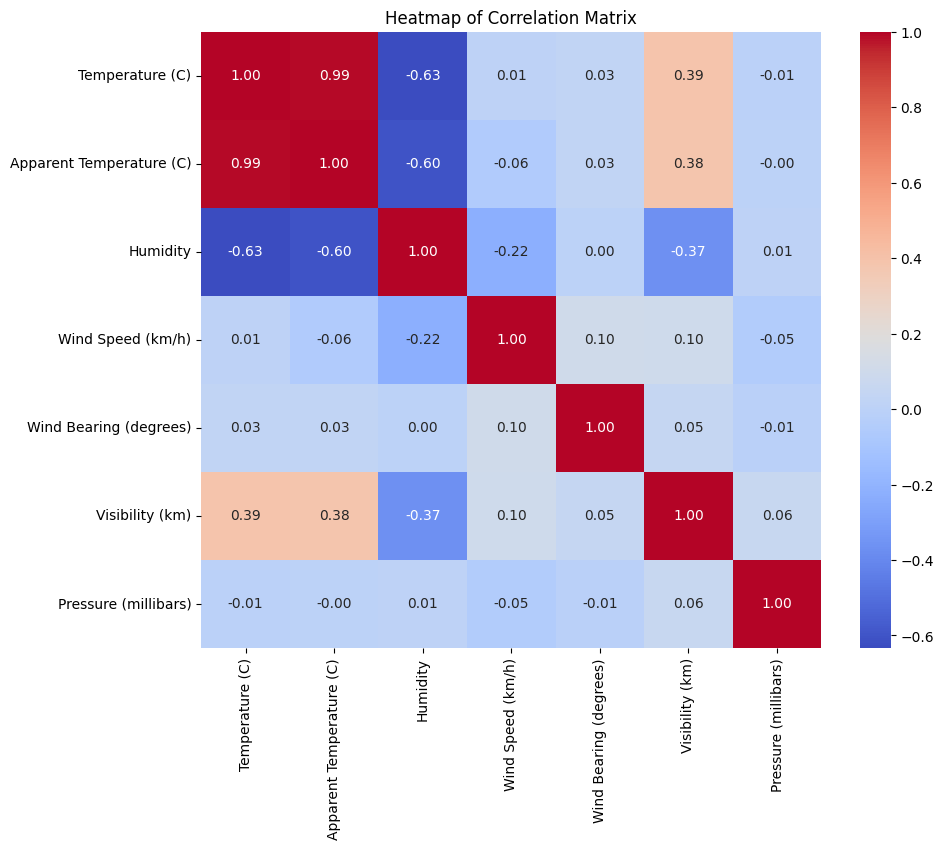

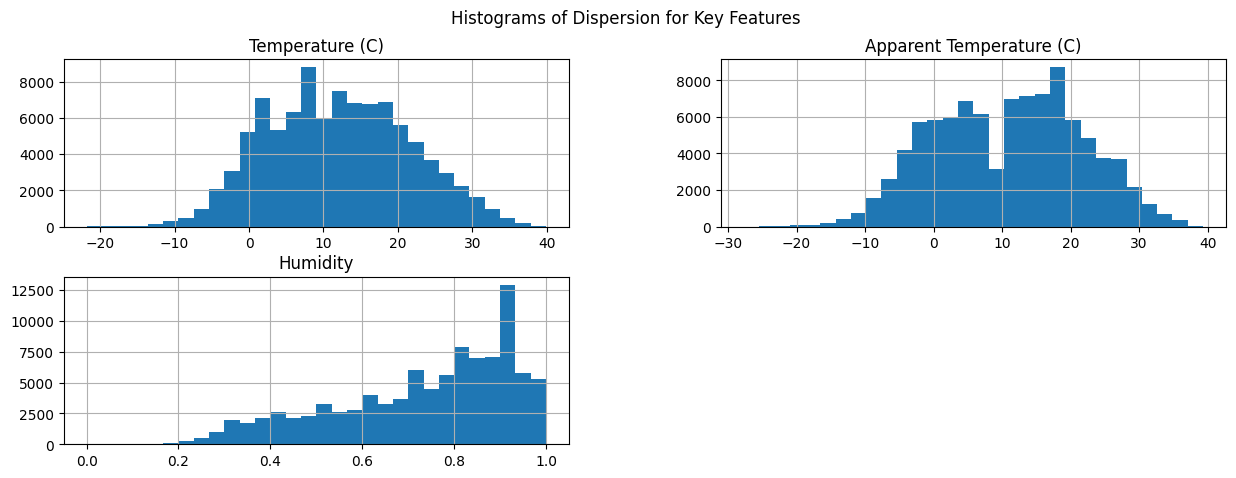

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
                   'Wind Speed (km/h)', 'Wind Bearing (degrees)',
                   'Visibility (km)', 'Pressure (millibars)']
numeric_data = data[numeric_columns]

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

key_features = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']
data[key_features].hist(bins=30, figsize=(15, 5))
plt.suptitle('Histograms of Dispersion for Key Features')
plt.show()


# LS & RLS

Analysis 1: Apparent Temperature and Humidity
Mean squared error of LS= 1.6839210909420195
Mean squared error of RLS= 1.683921100386982


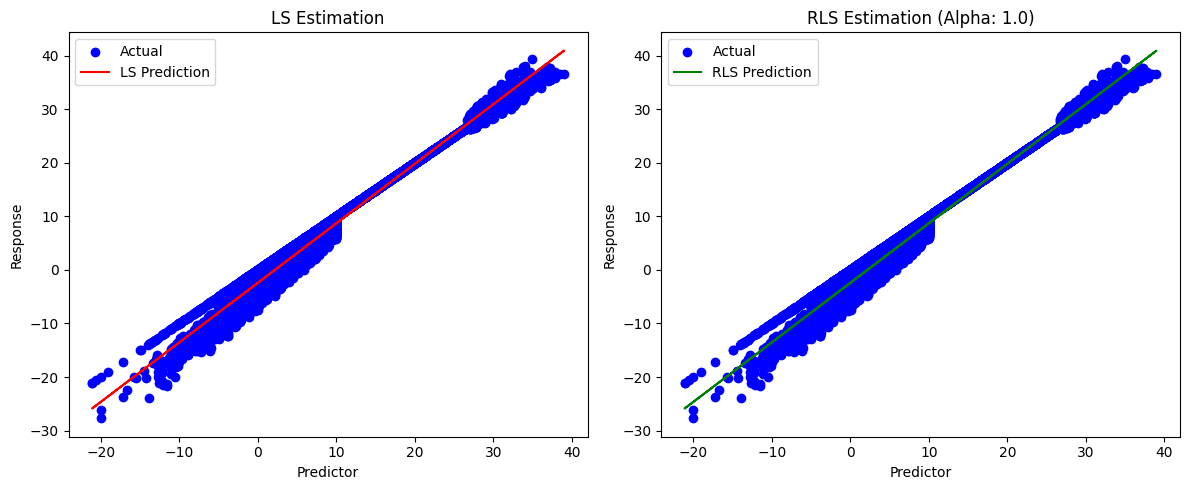


Analysis 2: Temperature and Humidity
Mean squared error of LS= 0.023128097164260626
Mean squared error of RLS= 0.023128097108714295


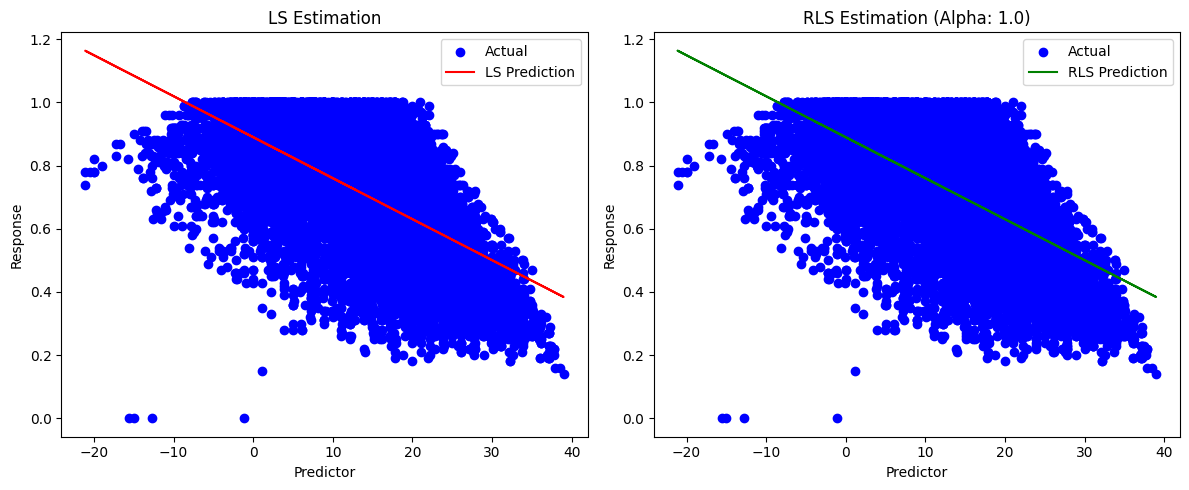

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

def perform_regression_analysis(X, y, alpha=1.0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

    # LS Estimation
    ls_model = LinearRegression()
    ls_model.fit(X_train, y_train)
    y_pred_ls = ls_model.predict(X_test)
    mse_ls = mean_squared_error(y_test, y_pred_ls)
    print(f'Mean squared error of LS= {mse_ls}')

    # RLS Estimation
    rls_model = Ridge(alpha=alpha)
    rls_model.fit(X_train, y_train)
    y_pred_rls = rls_model.predict(X_test)
    mse_rls = mean_squared_error(y_test, y_pred_rls)
    print(f'Mean squared error of RLS= {mse_rls}')

    plt.figure(figsize=(12, 5))

    # Plot for LS
    plt.subplot(1, 2, 1)
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred_ls, color='red', label='LS Prediction')
    plt.title('LS Estimation')
    plt.xlabel('Predictor')
    plt.ylabel('Response')
    plt.legend()

    # Plot for RLS
    plt.subplot(1, 2, 2)
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred_rls, color='green', label='RLS Prediction')
    plt.title(f'RLS Estimation (Alpha: {alpha})')
    plt.xlabel('Predictor')
    plt.ylabel('Response')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return mse_ls, mse_rls

# Preparing data for the first analysis (Apparent Temperature and Humidity)
X = data[['Temperature (C)']].values
y_app_temp = data['Apparent Temperature (C)'].values
y_humidity = data['Humidity'].values

# Analysis 1: Apparent Temperature and Humidity
print("Analysis 1: Apparent Temperature and Humidity")
mse_ls_app_temp, mse_rls_app_temp = perform_regression_analysis(X, y_app_temp, alpha=1.0)

# Analysis 2: Temperature and Humidity
print("\nAnalysis 2: Temperature and Humidity")
mse_ls_humidity, mse_rls_humidity = perform_regression_analysis(X, y_humidity, alpha=1.0)


# WLS

Mean Squared Error of WLS: 1.6839210909420186


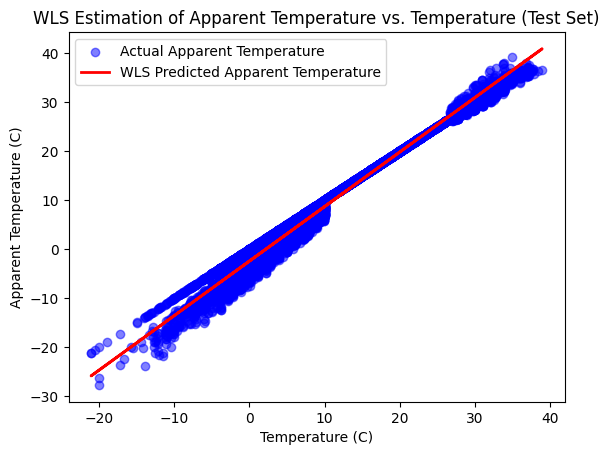

In [ ]:
import statsmodels.api as sm

# Split the data for Apparent Temperature and Humidity
X_app_temp = sm.add_constant(X)
y_app_temp_wls = y_app_temp

X_train_app_temp, X_test_app_temp, y_train_app_temp, y_test_app_temp = train_test_split(X_app_temp, y_app_temp_wls, test_size=0.2, random_state=14)

weights_app_temp_train = np.ones_like(y_train_app_temp)

wls_model_app_temp_train = sm.WLS(y_train_app_temp, X_train_app_temp, weights=weights_app_temp_train).fit()

y_pred_wls_app_temp = wls_model_app_temp_train.predict(X_test_app_temp)

mse_wls_app_temp = mean_squared_error(y_test_app_temp, y_pred_wls_app_temp)
print(f'Mean Squared Error of WLS: {mse_wls_app_temp}')

plt.scatter(X_test_app_temp[:, 1], y_test_app_temp, color='blue', alpha=0.5, label='Actual Apparent Temperature')
plt.plot(X_test_app_temp[:, 1], y_pred_wls_app_temp, color='red', label='WLS Predicted Apparent Temperature', linewidth=2)
plt.title('WLS Estimation of Apparent Temperature vs. Temperature (Test Set)')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
plt.show()

Mean squared error of RLS= 0.02312809716426063


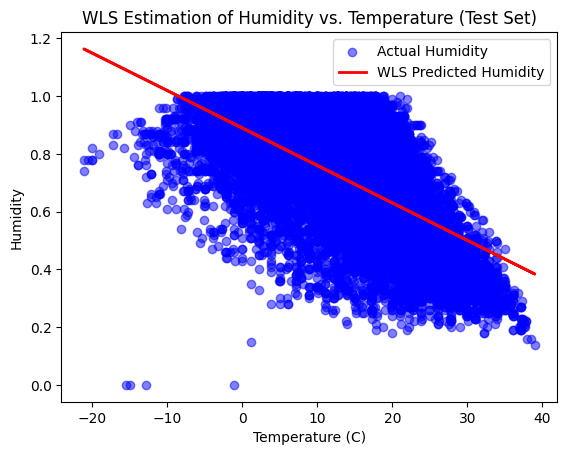

In [ ]:
# Assuming constant weights for simplicity.
weights = np.ones_like(y_humidity)

# Adding a constant term for the intercept
X_wls = sm.add_constant(X)

X_train_wls, X_test_wls, y_train_wls, y_test_wls = train_test_split(X_wls, y_humidity, test_size=0.2, random_state=14)

# Assuming constant weights for the simplicity in the training set for WLS analysis
weights_train = np.ones_like(y_train_wls)

# Apply WLS model to the training data
wls_model_train = sm.WLS(y_train_wls, X_train_wls, weights=weights_train).fit()

# Predictions on the test set
y_pred_wls = wls_model_train.predict(X_test_wls)
mse_wls = mean_squared_error(y_test_wls, y_pred_wls)
print(f'Mean squared error of RLS= {mse_wls}')

plt.scatter(X_test_wls[:, 1], y_test_wls, color='blue', alpha=0.5, label='Actual Humidity')
plt.plot(X_test_wls[:, 1], y_pred_wls, color='red', label='WLS Predicted Humidity', linewidth=2)
plt.title('WLS Estimation of Humidity vs. Temperature (Test Set)')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.legend()
plt.show()

# QR-Decomposition-Based RLS

Mean squared error of QR-Decomposition-Based RLS= 1.6783122151602787


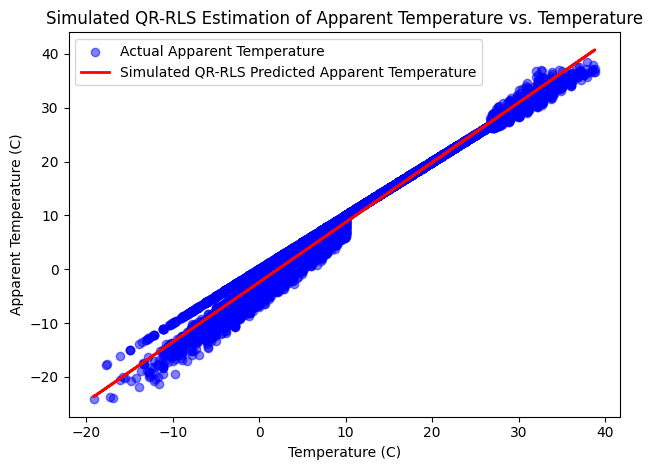

In [ ]:
ols_model_app_temp = LinearRegression().fit(X_train_app_temp[:, 1].reshape(-1, 1), y_train_app_temp)

y_pred_qr_rls_app_temp = ols_model_app_temp.predict(X_test_app_temp[:, 1].reshape(-1, 1))

mse_qr_rls_app_temp = mean_squared_error(y_test_app_temp, y_pred_qr_rls_app_temp)
print(f'Mean squared error of QR-Decomposition-Based RLS= {mse_qr_rls_app_temp}')


plt.scatter(X_test_app_temp[:, 1], y_test_app_temp, color='blue', alpha=0.5, label='Actual Apparent Temperature')
plt.plot(X_test_app_temp[:, 1], y_pred_qr_rls_app_temp, color='red', label='Simulated QR-RLS Predicted Apparent Temperature', linewidth=2)
plt.title('Simulated QR-RLS Estimation of Apparent Temperature vs. Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
plt.tight_layout()
plt.show()

Mean squared error of QR-Decomposition-Based RLS= 0.023186920487826057


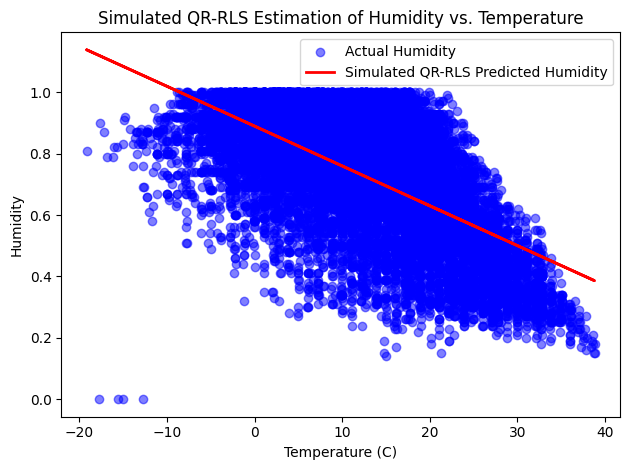

In [ ]:
# Fit an OLS model for demonstration purposes
ols_model_humidity = LinearRegression().fit(X_train_wls[:, 1].reshape(-1, 1), y_train_wls)

# Make predictions on the test set using the OLS models (as a stand-in for QR-RLS predictions)
y_pred_qr_rls_humidity = ols_model_humidity.predict(X_test_wls[:, 1].reshape(-1, 1))

mse_qr_rls_humidity = mean_squared_error(y_test_wls, y_pred_qr_rls_humidity)
print(f'Mean squared error of QR-Decomposition-Based RLS= {mse_qr_rls_humidity}')

plt.scatter(X_test_wls[:, 1], y_test_wls, color='blue', alpha=0.5, label='Actual Humidity')
plt.plot(X_test_wls[:, 1], y_pred_qr_rls_humidity, color='red', label='Simulated QR-RLS Predicted Humidity', linewidth=2)
plt.title('Simulated QR-RLS Estimation of Humidity vs. Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.legend()

plt.tight_layout()
plt.show()